# **k-Nearest Neighbors for Classification Problem**

### **Part 1:** Load and Clean Data

In [76]:
# Classification Examples

# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

# Load data
data = pd.read_csv('../data/diabetes.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
# Separate out classfiers
X = data.copy().drop(columns=['Outcome'])
y = data.copy()['Outcome']

# Standardize values
clean_data = data.copy()
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

# Generate training and testing set: 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### **Part 2:** Make k-NN Models for k-Sizes Between 2 and 10

In [78]:
# Make k-NN models with k's between 2 and 10

# Make a k-NN models in list
knn = []
predictions = []
for k in range(2, 11):

    # Form the model
    model = KNeighborsClassifier(n_neighbors=k)

    # Train each model
    model.fit(X_train, y_train)

    # Predict the values
    predictions.append(model.predict(X_test))

    # Add to model list
    knn.append(model)

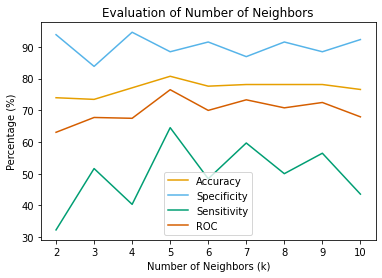

In [79]:
# Get evaluation metrics
k = list(range(2, 11))
acc = []
spec = []
sens = []
roc = []
for prediction in predictions:
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    acc.append((tn + tp)/(tn + tp + fn + fp) * 100)
    sens.append((tp)/(tp + fn) * 100)
    spec.append((tn)/(tn + fp) * 100)
    roc.append(roc_auc_score(y_test, prediction) * 100)

# Graph evaluation metrics
fig, ax = plt.subplots()
ax.plot(k, acc, color=colors[0], alpha=1, label='Accuracy')
ax.plot(k, spec, color=colors[1], alpha=1, label='Specificity')
ax.plot(k, sens, color=colors[2], alpha=1, label='Sensitivity')
ax.plot(k, roc, color=colors[4], alpha=1, label='ROC')
ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Percentage (%)')
ax.set_title(f'Evaluation of Number of Neighbors')
ax.legend(facecolor='white')
plt.show()

# Appears that 5 neighbors is the ideal number of neighbors

### **Part 3:** Tune the Hyperparameters with GridSearchCV

In [80]:
# Source: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

# List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(2, 11))
p=[1, 2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn_hp = KNeighborsClassifier()

# Use grid search to find the ideal hyperparamters
clf = GridSearchCV(knn_hp, hyperparameters, cv=10)

# Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 3


In [81]:
# Show the metrics of the best model
prediction = best_model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       130
           1       0.60      0.52      0.56        62

    accuracy                           0.73       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.73      0.73      0.73       192



### **Part 4:** Removing Properties to Improve Performance

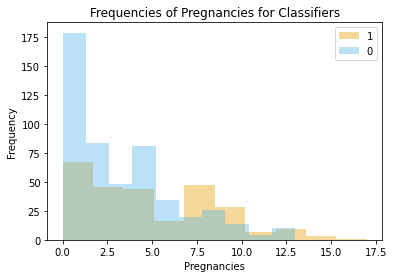

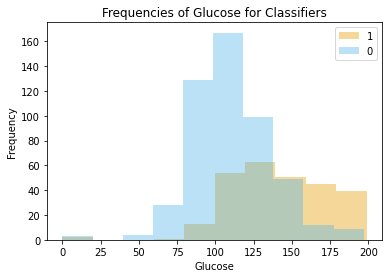

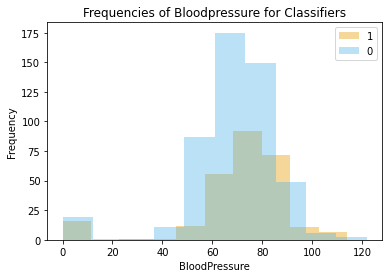

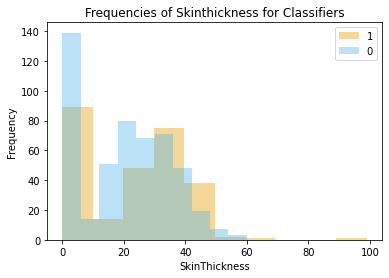

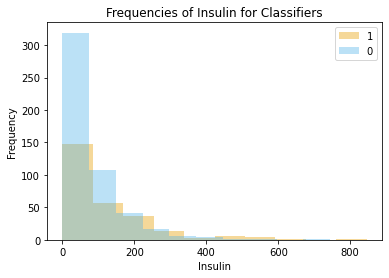

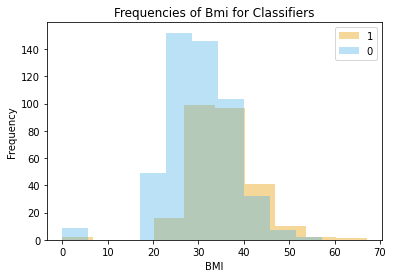

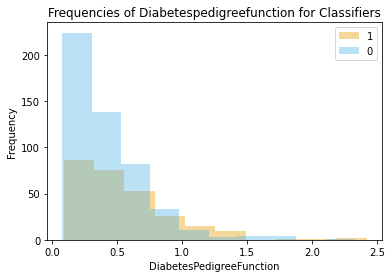

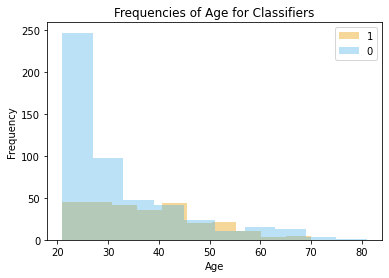

In [82]:
# Plot classification map
for column in data.drop(columns='Outcome').columns:
    fig, ax = plt.subplots()
    i = 0
    for classifier in data['Outcome'].unique():
        this_data = data[data['Outcome'] == classifier]
        ax.hist(this_data[column], color=colors[i], alpha=0.4, label=classifier)
        i += 1
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequencies of {column.capitalize()} for Classifiers')
    ax.legend(facecolor='white')
    plt.show()

# Removed columns: BloodPressure, SkinThickness, Insulin, and DiabetesPedigreeFunction

In [83]:
# Prepare data

# Drop columns
drop_columns = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
new_data = data.drop(columns=drop_columns).copy()

# Separate out classfiers
X_d = new_data.copy().drop(columns=['Outcome'])
y_d = new_data.copy()['Outcome']

# Standardize values
clean_data_d = new_data.copy()
ss_d = StandardScaler()
ss_d.fit(X_d)
X_d[:] = ss_d.transform(X_d)

# Generate training and testing set: 25%
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

In [84]:
# Train model using grid search

# Create new KNN object
knn_d_hp = KNeighborsClassifier()

# Use grid search to find the ideal hyperparamters
clf_d = GridSearchCV(knn_d_hp, hyperparameters, cv=10)

# Fit the model
best_model_d = clf_d.fit(X_d_train, y_d_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model_d.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_d.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_d.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 10


In [85]:
# Show the metrics of the best model
prediction_d = best_model_d.predict(X_d_test)
print(classification_report(y_d_test, prediction_d))

# Appears to dramatically improve performance!

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

